# Maestría en Economía Aplicada - UBA

## Taller de Programación

## Trabajo Práctico 4

## Docente: Noelia Romero

## Grupo No 5

## Cammisi, Andrés // Porco, Matías // Pineda, David

In [2]:
# ============================================================
# TP4 - PREPARACIÓN OPTIMIZADA DE LA BASE DE DATOS
# ============================================================

# 1. Librerías
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
# ------------------------------------------------------------
# 2. Directorio de trabajo
# ------------------------------------------------------------
path = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP4'
os.chdir(path)
print("Working Directory:", os.getcwd())


Working Directory: /Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP4


In [4]:
# ------------------------------------------------------------
# 3. Cargar base de datos
# ------------------------------------------------------------
fname = 'eph_tp4_05_25.csv'
df = pd.read_csv(fname)

print("Dimensiones totales:", df.shape)
print("\nVariables disponibles:")
print(df.columns.tolist())

Dimensiones totales: (28454, 29)

Variables disponibles:
['anio', 'cat_inac', 'cat_ocup', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 'codusu', 'estado', 'ipcf', 'itf', 'miembros_hogar', 'nivel_ed', 'nro_hogar', 'pondera', 'pp03d', 'pp04a', 'pp04c', 'pp10a', 'pp3e_tot', 'pp3e_tot_missing', 'pp3f_tot', 'pp3f_tot_missing', 'lp_pc', 'pobre']


In [5]:
# ------------------------------------------------------------
# 4. Filtrar año 2025 y crear variable respondedieron
# ------------------------------------------------------------
df_2025 = df[df['anio'] == 2025].copy()
print(f"\nBase 2025: {df_2025.shape[0]:,} observaciones")

# Variable respondedieron (igual que TP3)
df_2025['respondieron'] = df_2025['itf'] > 0
print(f"Tasa de respuesta 2025: {(df_2025['respondieron'].mean()*100):.1f}%")

# Separar bases
respondieron_2025 = df_2025[df_2025['respondieron'] == True].copy()
norespondieron_2025 = df_2025[df_2025['respondieron'] == False].copy()

print(f"Respondieron 2025: {len(respondieron_2025):,}")
print(f"No respondieron 2025: {len(norespondieron_2025):,}")


Base 2025: 13,803 observaciones
Tasa de respuesta 2025: 67.7%
Respondieron 2025: 9,340
No respondieron 2025: 4,463


In [6]:
# ------------------------------------------------------------
# 5. DEFINICIÓN DE VARIABLES (Mismo set que TP3)
# ------------------------------------------------------------
variables_x = [
    # Variables demográficas
    'ch03',          # Parentesco (categórica)
    'ch04',          # Sexo (categórica)  
    'ch06',          # Edad (numérica)
    'ch07',          # Estado civil (categórica)
    
    # Variables socioeconómicas
    'estado',        # Condición de actividad (categórica)
    'nivel_ed',      # Nivel educativo (categórica)
    'cat_ocup',      # Categoría ocupacional (categórica)
    'cat_inac',      # Categoría de inactividad (categórica)
    
    # Características del hogar
    'miembros_hogar' # Tamaño del hogar (numérica)
]

# Variable objetivo
variable_y = 'pobre'

print(f"\nVariables predictoras: {len(variables_x)}")
print(f"Variable objetivo: {variable_y}")


Variables predictoras: 9
Variable objetivo: pobre


In [7]:
# ------------------------------------------------------------
# 6. PREPROCESAMIENTO
# ------------------------------------------------------------

# Separar features y target
X_2025 = respondieron_2025[variables_x].copy()
y_2025 = respondieron_2025[variable_y].astype(int)

# Identificar tipos de variables
categorical_features = ['ch03', 'ch04', 'ch07', 'estado', 'nivel_ed', 'cat_ocup', 'cat_inac']
numerical_features = ['ch06', 'miembros_hogar']

print(f"\nVariables categóricas ({len(categorical_features)}): {categorical_features}")
print(f"Variables numéricas ({len(numerical_features)}): {numerical_features}")

# Chequear valores faltantes
print("\nValores faltantes por variable:")
print(X_2025.isnull().sum())

# Configurar preprocessor para regularización
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ]), categorical_features)
    ])

print("\n Preprocessor configurado correctamente")


Variables categóricas (7): ['ch03', 'ch04', 'ch07', 'estado', 'nivel_ed', 'cat_ocup', 'cat_inac']
Variables numéricas (2): ['ch06', 'miembros_hogar']

Valores faltantes por variable:
ch03              0
ch04              0
ch06              0
ch07              0
estado            0
nivel_ed          0
cat_ocup          0
cat_inac          0
miembros_hogar    0
dtype: int64

✅ Preprocessor configurado correctamente


In [8]:
# ------------------------------------------------------------
# 7. TRAIN/TEST SPLIT (70/30) - Igual que TP3
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_2025,
    y_2025,
    test_size=0.30,
    random_state=444,
    stratify=y_2025
)

print(f"\n DIVISIÓN TRAIN/TEST:")
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_test : {X_test.shape} | y_test : {y_test.shape}")
print(f"Tasa de pobreza en train: {y_train.mean():.3f}")
print(f"Tasa de pobreza en test : {y_test.mean():.3f}")



🎯 DIVISIÓN TRAIN/TEST:
X_train: (6538, 9) | y_train: (6538,)
X_test : (2802, 9) | y_test : (2802,)
Tasa de pobreza en train: 0.462
Tasa de pobreza en test : 0.463


In [9]:
# ------------------------------------------------------------
# 8. INFORMACIÓN ADICIONAL PARA ANÁLISIS
# ------------------------------------------------------------
print(f"\n INFORMACIÓN PARA EL INFORME:")
print(f"• Total observaciones 2025: {len(df_2025):,}")
print(f"• Tasa de pobreza general: {df_2025['pobre'].mean():.3f}")
print(f"• Variables predictoras: {len(variables_x)}")
print(f"• Split: 70% train, 30% test")
print(f"• Semilla: 444 (reproducibilidad)")



📊 INFORMACIÓN PARA EL INFORME:
• Total observaciones 2025: 13,803
• Tasa de pobreza general: 0.636
• Variables predictoras: 9
• Split: 70% train, 30% test
• Semilla: 444 (reproducibilidad)


In [10]:
# ------------------------------------------------------------
# 9. GUARDAR OBJETOS PARA MODELOS TP4
# ------------------------------------------------------------
# Estos objetos serán usados en los próximos bloques
print("\n BASE DE DATOS PREPARADA PARA TP4")


✅ BASE DE DATOS PREPARADA PARA TP4


In [11]:
# ------------------------------------------------------------
# A. MODELO DE REGRESIÓN LÓGISTICA
# REGULARIZACIÓN RIDGE Y LASSO
# ------------------------------------------------------------

In [15]:
# =============================================================
# A.0) PREPARACIÓN PARA REGULARIZACIÓN - PREPROCESAMIENTO CORREGIDO
# =============================================================

print("APLICANDO PREPROCESAMIENTO PARA REGULARIZACIÓN...")

# Primero, verificar los tipos de datos reales
print("TIPOS DE DATOS EN X_train:")
print(X_train.dtypes)

# Convertir variables categóricas a string para el encoding correcto
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

categorical_features = ['ch03', 'ch04', 'ch07', 'estado', 'nivel_ed', 'cat_ocup', 'cat_inac']
numerical_features = ['ch06', 'miembros_hogar']

for col in categorical_features:
    X_train_encoded[col] = X_train_encoded[col].astype(str)
    X_test_encoded[col] = X_test_encoded[col].astype(str)

print("\n Variables categóricas convertidas a string")

# Configurar preprocessor CORREGIDO
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train_encoded)
X_test_processed = preprocessor.transform(X_test_encoded)

# Obtener nombres de las variables después del preprocesamiento
feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features))
)

print(f"\n Preprocesamiento completado:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")
print(f"Número de features después de encoding: {len(feature_names)}")
print(f"Primeras 10 features: {feature_names[:10]}")

# Verificar que no hay NaN
print(f"\n VALORES FALTANTES:")
print(f"NaN en X_train_processed: {np.isnan(X_train_processed).sum()}")
print(f"NaN en X_test_processed: {np.isnan(X_test_processed).sum()}")

APLICANDO PREPROCESAMIENTO PARA REGULARIZACIÓN...
TIPOS DE DATOS EN X_train:
ch03              float64
ch04              float64
ch06              float64
ch07              float64
estado            float64
nivel_ed          float64
cat_ocup          float64
cat_inac          float64
miembros_hogar    float64
dtype: object

 Variables categóricas convertidas a string

 Preprocesamiento completado:
X_train_processed: (6538, 36)
X_test_processed: (2802, 36)
Número de features después de encoding: 36
Primeras 10 features: ['ch06', 'miembros_hogar', 'ch03_10.0', 'ch03_2.0', 'ch03_3.0', 'ch03_4.0', 'ch03_5.0', 'ch03_6.0', 'ch03_7.0', 'ch03_8.0']

🔍 VALORES FALTANTES:
NaN en X_train_processed: 0
NaN en X_test_processed: 0


In [16]:
# =============================================================
# A.1) VISUALIZACIÓN DE COEFICIENTES - RIDGE vs LASSO
# =============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

# Grilla de parámetros
exponentes = np.arange(-5, 6)
lambdas = 10.0 ** exponentes
C_values = 1.0 / lambdas

print("Grilla de parámetros:")
print(f"λ (penalidad): {lambdas}")
print(f"C (inverso): {C_values}")

print("\n Entrenando modelos para cada valor de λ...")

# Ajustar modelos para cada valor de C
coefs_l1, coefs_l2 = [], []

for i, C in enumerate(C_values):
    print(f"  Procesando λ = 10^{exponentes[i]:2d} (C = {C:.6f})...")
    
    # LASSO (L1)
    logit_l1 = LogisticRegression(
        penalty='l1', C=C, solver='liblinear', 
        random_state=444, max_iter=5000
    )
    logit_l1.fit(X_train_processed, y_train)
    coefs_l1.append(logit_l1.coef_[0])
    
    # Ridge (L2)
    logit_l2 = LogisticRegression(
        penalty='l2', C=C, solver='liblinear', 
        random_state=444, max_iter=5000
    )
    logit_l2.fit(X_train_processed, y_train)
    coefs_l2.append(logit_l2.coef_[0])

coefs_l1, coefs_l2 = np.array(coefs_l1), np.array(coefs_l2)

print(f" Modelos entrenados:")
print(f"Coeficientes L1: {coefs_l1.shape}")
print(f"Coeficientes L2: {coefs_l2.shape}")

# Selección de las 15 variables más importantes para visualización
coef_variation = np.std(coefs_l2, axis=0)  # Usar Ridge para selección
top_15_idx = np.argsort(coef_variation)[-15:][::-1]
top_15_names = [feature_names[i] for i in top_15_idx]

print(f"\n Top 15 variables más importantes:")
for i, idx in enumerate(top_15_idx):
    print(f"  {i+1:2d}. {feature_names[idx]}")

Grilla de parámetros:
λ (penalidad): [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
C (inverso): [1.e+05 1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04
 1.e-05]

 Entrenando modelos para cada valor de λ...
  Procesando λ = 10^-5 (C = 100000.000000)...
  Procesando λ = 10^-4 (C = 10000.000000)...
  Procesando λ = 10^-3 (C = 1000.000000)...
  Procesando λ = 10^-2 (C = 100.000000)...
  Procesando λ = 10^-1 (C = 10.000000)...
  Procesando λ = 10^ 0 (C = 1.000000)...
  Procesando λ = 10^ 1 (C = 0.100000)...
  Procesando λ = 10^ 2 (C = 0.010000)...
  Procesando λ = 10^ 3 (C = 0.001000)...
  Procesando λ = 10^ 4 (C = 0.000100)...
  Procesando λ = 10^ 5 (C = 0.000010)...
 Modelos entrenados:
Coeficientes L1: (11, 36)
Coeficientes L2: (11, 36)

 Top 15 variables más importantes:
   1. nivel_ed_6.0
   2. ch03_7.0
   3. estado_2.0
   4. ch03_5.0
   5. ch03_3.0
   6. ch03_10.0
   7. cat_inac_2.0
   8. miembros_hogar
   9. nivel_ed_5.0
  10. cat_ocup

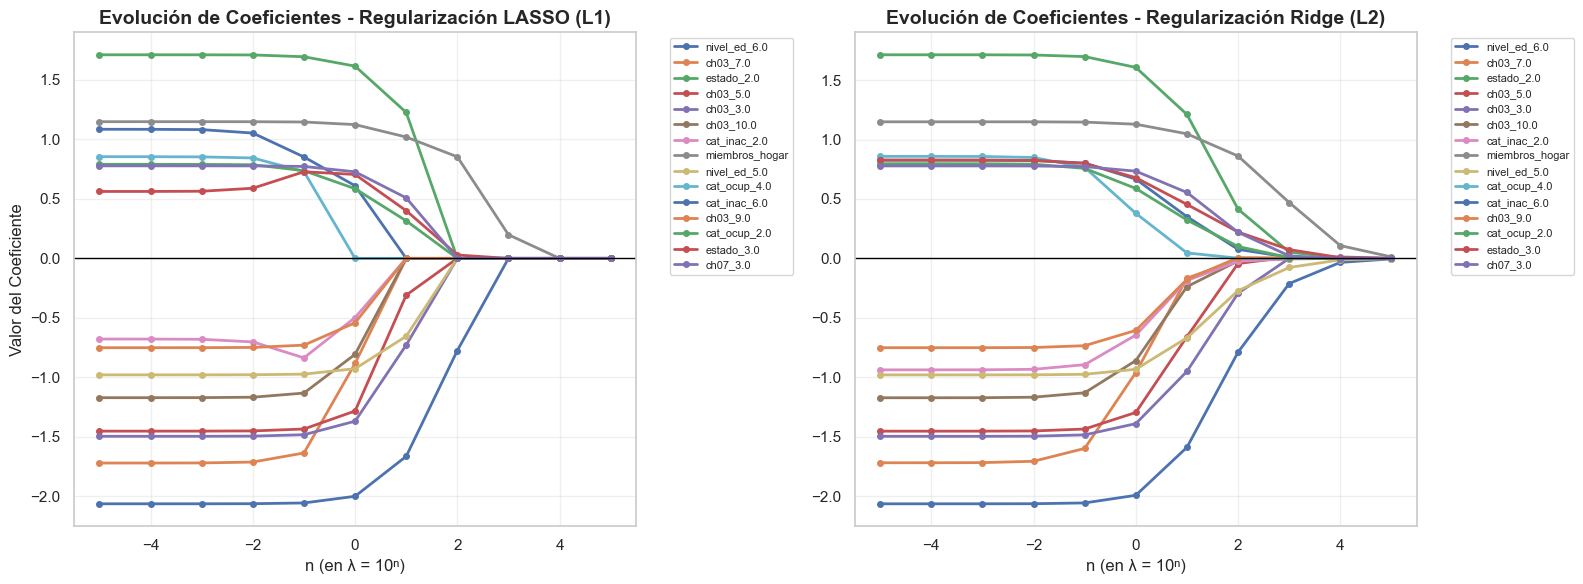

 Gráficos de coeficientes generados

 COMPORTAMIENTO INICIAL DE LOS COEFICIENTES:
LASSO (L1): Algunos coeficientes se vuelven exactamente 0 cuando λ aumenta
Ridge (L2): Todos los coeficientes se achican pero ninguno llega a 0


In [17]:
# =============================================================
# A.1.2) GRÁFICOS DE COEFICIENTES
# =============================================================

# Gráficos de coeficientes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel A: LASSO (L1)
for j in top_15_idx:
    axes[0].plot(exponentes, coefs_l1[:, j], marker='o', linewidth=2, 
                label=feature_names[j], markersize=4)

axes[0].set_title("Evolución de Coeficientes - Regularización LASSO (L1)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("n (en λ = 10ⁿ)", fontsize=12)
axes[0].set_ylabel("Valor del Coeficiente", fontsize=12)
axes[0].axhline(0, color='black', linewidth=1)
axes[0].grid(True, alpha=0.3)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Panel B: Ridge (L2)
for j in top_15_idx:
    axes[1].plot(exponentes, coefs_l2[:, j], marker='o', linewidth=2, 
                label=feature_names[j], markersize=4)

axes[1].set_title("Evolución de Coeficientes - Regularización Ridge (L2)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("n (en λ = 10ⁿ)", fontsize=12)
axes[1].axhline(0, color='black', linewidth=1)
axes[1].grid(True, alpha=0.3)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

print(" Gráficos de coeficientes generados")

# Análisis inicial del comportamiento
print("\n COMPORTAMIENTO INICIAL DE LOS COEFICIENTES:")
print("LASSO (L1): Algunos coeficientes se vuelven exactamente 0 cuando λ aumenta")
print("Ridge (L2): Todos los coeficientes se achican pero ninguno llega a 0")

In [18]:
# =============================================================
# A.2) PENALIDAD ÓPTIMA POR CROSS-VALIDATION
# =============================================================

from sklearn.linear_model import LogisticRegressionCV

print(" BUSCANDO PENALIDAD ÓPTIMA CON 5-FOLD CV...")

# CV para LASSO (L1)
print(" Entrenando LASSO con CV...")
logit_l1_cv = LogisticRegressionCV(
    Cs=C_values, cv=5, penalty='l1', solver='liblinear',
    scoring='accuracy', random_state=444, max_iter=5000, refit=True
)
logit_l1_cv.fit(X_train_processed, y_train)

best_C_l1 = logit_l1_cv.C_[0]
best_lambda_l1 = 1 / best_C_l1
mean_scores_l1 = logit_l1_cv.scores_[1].mean(axis=0)
error_l1 = 1 - mean_scores_l1

print(f" LASSO - Mejor λ: {best_lambda_l1:.6f} | Mejor C: {best_C_l1:.6f}")

# CV para Ridge (L2)
print(" Entrenando Ridge con CV...")
logit_l2_cv = LogisticRegressionCV(
    Cs=C_values, cv=5, penalty='l2', solver='liblinear', 
    scoring='accuracy', random_state=444, max_iter=5000, refit=True
)
logit_l2_cv.fit(X_train_processed, y_train)

best_C_l2 = logit_l2_cv.C_[0]
best_lambda_l2 = 1 / best_C_l2
mean_scores_l2 = logit_l2_cv.scores_[1].mean(axis=0)
error_l2 = 1 - mean_scores_l2

print(f" RIDGE - Mejor λ: {best_lambda_l2:.6f} | Mejor C: {best_C_l2:.6f}")

 BUSCANDO PENALIDAD ÓPTIMA CON 5-FOLD CV...
 Entrenando LASSO con CV...
 LASSO - Mejor λ: 0.001000 | Mejor C: 1000.000000
 Entrenando Ridge con CV...
 RIDGE - Mejor λ: 0.010000 | Mejor C: 100.000000


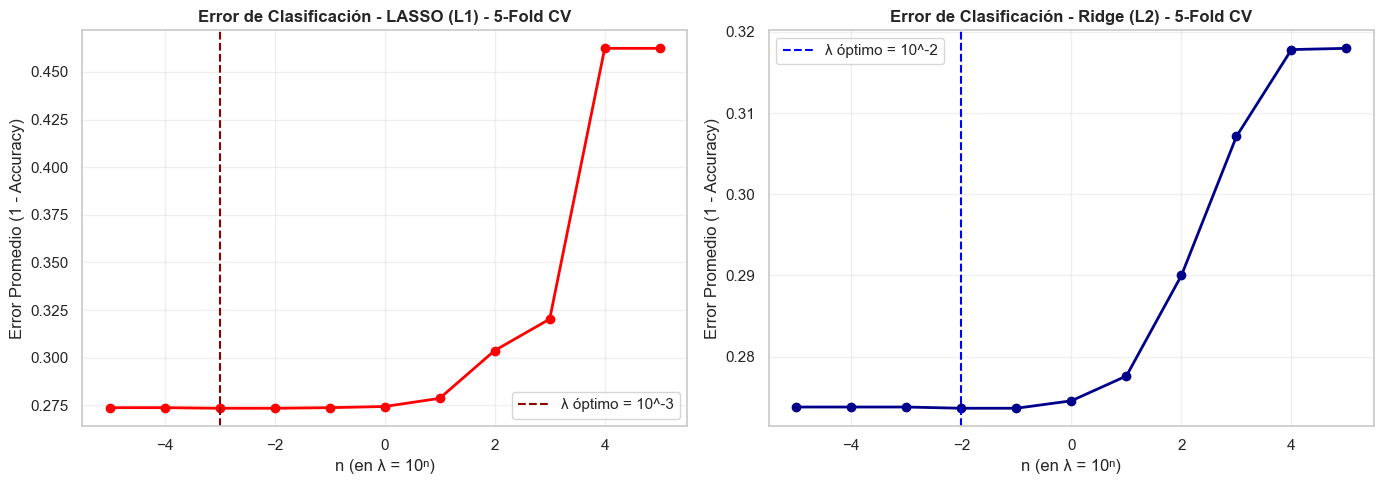

 RESUMEN DE ERRORES MÍNIMOS:
LASSO - Error mínimo: 0.2735 en λ = 10^-3
RIDGE - Error mínimo: 0.2736 en λ = 10^-2


In [50]:
# =============================================================
# A.2.2) GRÁFICO DE ERRORES DE CV
# =============================================================

# Gráfico de errores de CV
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Error LASSO
axes[0].plot(exponentes, error_l1, marker='o', linewidth=2, color='red', markersize=6)
axes[0].axvline(exponentes[np.argmin(error_l1)], color='darkred', linestyle='--', 
                label=f'λ óptimo = 10^{exponentes[np.argmin(error_l1)]}')
axes[0].set_title("Error de Clasificación - LASSO (L1) - 5-Fold CV", fontweight='bold')
axes[0].set_xlabel("n (en λ = 10ⁿ)")
axes[0].set_ylabel("Error Promedio (1 - Accuracy)")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Panel B: Error Ridge
axes[1].plot(exponentes, error_l2, marker='o', linewidth=2, color='darkblue', markersize=6)
axes[1].axvline(exponentes[np.argmin(error_l2)], color='blue', linestyle='--',
                label=f'λ óptimo = 10^{exponentes[np.argmin(error_l2)]}')
axes[1].set_title("Error de Clasificación - Ridge (L2) - 5-Fold CV", fontweight='bold')
axes[1].set_xlabel("n (en λ = 10ⁿ)")
axes[1].set_ylabel("Error Promedio (1 - Accuracy)")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print(" RESUMEN DE ERRORES MÍNIMOS:")
print(f"LASSO - Error mínimo: {error_l1.min():.4f} en λ = 10^{exponentes[np.argmin(error_l1)]}")
print(f"RIDGE - Error mínimo: {error_l2.min():.4f} en λ = 10^{exponentes[np.argmin(error_l2)]}")

 CALCULANDO PROPORCIÓN DE VARIABLES ELIMINADAS POR LASSO...
  λ = 10^-5 (C = 100000.00000)... Variables eliminadas: 0/36 (0.0%)
  λ = 10^-4 (C = 10000.00000)... Variables eliminadas: 0/36 (0.0%)
Variables eliminadas: 0/36 (0.0%)
  λ = 10^-2 (C = 100.00000)... Variables eliminadas: 0/36 (0.0%)
Variables eliminadas: 0/36 (0.0%)
  λ = 10^ 0 (C = 1.00000)... Variables eliminadas: 3/36 (8.3%)
  λ = 10^ 1 (C = 0.10000)... Variables eliminadas: 13/36 (36.1%)
  λ = 10^ 2 (C = 0.01000)... Variables eliminadas: 30/36 (83.3%)
  λ = 10^ 3 (C = 0.00100)... Variables eliminadas: 35/36 (97.2%)
  λ = 10^ 4 (C = 0.00010)... Variables eliminadas: 36/36 (100.0%)
  λ = 10^ 5 (C = 0.00001)... Variables eliminadas: 36/36 (100.0%)


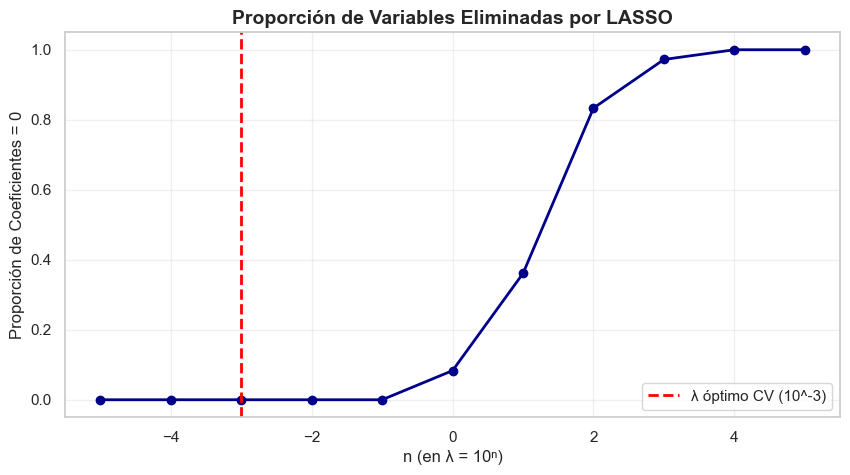


 ANÁLISIS EN λ ÓPTIMO (10^-3):
   - Proporción de variables eliminadas: 0.0%
   - Número de variables eliminadas: 0 de 36
   - Error de clasificación: 0.2735


In [51]:
# =============================================================
# A.2.3) PROPORCIÓN DE VARIABLES IGNORADAS (LASSO)
# =============================================================

print(" CALCULANDO PROPORCIÓN DE VARIABLES ELIMINADAS POR LASSO...")

proporcion_ceros, n_variables_eliminadas = [], []

for i, C in enumerate(C_values):
    print(f"  λ = 10^{exponentes[i]:2d} (C = {C:.5f})...", end=" ")
    
    modelo = LogisticRegression(
        penalty='l1', C=C, solver='liblinear', max_iter=5000, random_state=444
    )
    modelo.fit(X_train_processed, y_train)
    coef = modelo.coef_[0]
    prop_cero = np.mean(coef == 0)
    n_elim = np.sum(coef == 0)
    
    proporcion_ceros.append(prop_cero)
    n_variables_eliminadas.append(n_elim)
    print(f"Variables eliminadas: {n_elim}/{len(coef)} ({prop_cero:.1%})")

# Gráfico de proporción de ceros
plt.figure(figsize=(10, 5))
plt.plot(exponentes, proporcion_ceros, marker='o', linewidth=2, color='darkblue', markersize=6)
plt.axvline(exponentes[np.argmin(error_l1)], color='red', linestyle='--', 
           label=f'λ óptimo CV (10^{exponentes[np.argmin(error_l1)]})', linewidth=2)
plt.title("Proporción de Variables Eliminadas por LASSO", fontweight='bold', fontsize=14)
plt.xlabel("n (en λ = 10ⁿ)")
plt.ylabel("Proporción de Coeficientes = 0")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Análisis detallado en el λ óptimo
opt_idx = np.argmin(error_l1)
print(f"\n ANÁLISIS EN λ ÓPTIMO (10^{exponentes[opt_idx]}):")
print(f"   - Proporción de variables eliminadas: {proporcion_ceros[opt_idx]:.1%}")
print(f"   - Número de variables eliminadas: {n_variables_eliminadas[opt_idx]} de {len(feature_names)}")
print(f"   - Error de clasificación: {error_l1[opt_idx]:.4f}")

In [21]:
# =============================================================
# A.3) MODELOS FINALES Y COMPARACIÓN DE COEFICIENTES
# =============================================================

print(" ENTRENANDO MODELOS FINALES...")

# 1) Modelo SIN penalidad (C muy grande)
print("1. Entrenando modelo sin penalidad...")
logit_none = LogisticRegression(
    penalty='l2', C=1e10, solver='lbfgs', 
    max_iter=5000, random_state=444
)
logit_none.fit(X_train_processed, y_train)

# 2) Modelo LASSO con λ óptimo
print("2. Entrenando modelo LASSO con λ óptimo...")
logit_l1_final = LogisticRegression(
    penalty='l1', C=best_C_l1, solver='liblinear',
    random_state=444, max_iter=5000
)
logit_l1_final.fit(X_train_processed, y_train)

# 3) Modelo Ridge con λ óptimo
print("3. Entrenando modelo Ridge con λ óptimo...")
logit_l2_final = LogisticRegression(
    penalty='l2', C=best_C_l2, solver='liblinear',
    random_state=444, max_iter=5000
)
logit_l2_final.fit(X_train_processed, y_train)

# Análisis de coeficientes
coef_none = logit_none.coef_[0]
coef_l1 = logit_l1_final.coef_[0]
coef_l2 = logit_l2_final.coef_[0]

n_zeros_l1 = (coef_l1 == 0).sum()
n_zeros_l2 = (coef_l2 == 0).sum()

print("\n MODELOS ENTRENADOS - RESUMEN:")
print(f"• Sin penalidad: {len(coef_none)} coeficientes")
print(f"• LASSO (L1): {n_zeros_l1} coeficientes = 0 ({n_zeros_l1/len(coef_l1):.1%})")
print(f"• Ridge (L2): {n_zeros_l2} coeficientes = 0 ({n_zeros_l2/len(coef_l2):.1%})")

 ENTRENANDO MODELOS FINALES...
1. Entrenando modelo sin penalidad...
2. Entrenando modelo LASSO con λ óptimo...
3. Entrenando modelo Ridge con λ óptimo...

 MODELOS ENTRENADOS - RESUMEN:
• Sin penalidad: 36 coeficientes
• LASSO (L1): 0 coeficientes = 0 (0.0%)
• Ridge (L2): 0 coeficientes = 0 (0.0%)


In [22]:
# =============================================================
# A.3.2) TABLA COMPARATIVA DE COEFICIENTES
# =============================================================

import pandas as pd

# Creación tabla comparativa
tabla_coefs = pd.DataFrame({
    'variable': feature_names,
    'logit_sin_penalidad': coef_none,
    'logit_L1_lambda_cv': coef_l1,
    'logit_L2_lambda_cv': coef_l2
})

# Calculo de cambios relativos
tabla_coefs['cambio_L1_vs_sin'] = (tabla_coefs['logit_L1_lambda_cv'] - tabla_coefs['logit_sin_penalidad']).abs()
tabla_coefs['cambio_L2_vs_sin'] = (tabla_coefs['logit_L2_lambda_cv'] - tabla_coefs['logit_sin_penalidad']).abs()
tabla_coefs['eliminado_L1'] = tabla_coefs['logit_L1_lambda_cv'] == 0

# Ordenar por magnitud en modelo sin penalidad
tabla_coefs = tabla_coefs.sort_values('logit_sin_penalidad', key=abs, ascending=False)

print(" TABLA DE COEFICIENTES - PRIMERAS 15 VARIABLES:")
display(tabla_coefs.head(15).round(4))

# Variables eliminadas por LASSO
vars_eliminadas = tabla_coefs[tabla_coefs['eliminado_L1']]
print(f"\n VARIABLES ELIMINADAS POR LASSO ({len(vars_eliminadas)}):")
if len(vars_eliminadas) > 0:
    display(vars_eliminadas[['variable', 'logit_sin_penalidad']].round(4))
else:
    print("   Ninguna variable fue completamente eliminada")

print(f"\n RESUMEN COMPARATIVO:")
print(f"• Variables eliminadas por LASSO: {tabla_coefs['eliminado_L1'].sum()} de {len(tabla_coefs)}")
print(f"• Cambio promedio absoluto LASSO: {tabla_coefs['cambio_L1_vs_sin'].mean():.4f}")
print(f"• Cambio promedio absoluto Ridge: {tabla_coefs['cambio_L2_vs_sin'].mean():.4f}")

# Exportar tabla completa
tabla_coefs.to_csv('coefs_logit_regularizacion_2025_completa.csv', index=False)
print(" Tabla exportada como 'coefs_logit_regularizacion_2025_completa.csv'")

 TABLA DE COEFICIENTES - PRIMERAS 15 VARIABLES:


,variable,logit_sin_penalidad,logit_L1_lambda_cv,logit_L2_lambda_cv,cambio_L1_vs_sin,cambio_L2_vs_sin,eliminado_L1
23,nivel_ed_6.0,-2.0708,-2.0631,-2.0621,0.0077,0.0087,False
16,estado_2.0,1.6855,1.7111,1.7108,0.0256,0.0253,False
8,ch03_7.0,-1.6125,-1.7197,-1.7053,0.1072,0.0928,False
4,ch03_3.0,-1.4845,-1.4955,-1.4942,0.0110,0.0097,False
6,ch03_5.0,-1.4345,-1.4521,-1.4504,0.0177,0.0159,False
2,ch03_10.0,-1.3003,-1.1707,-1.1666,0.1296,0.1336,False
1,miembros_hogar,1.1471,1.1490,1.1488,0.0019,0.0016,False
30,cat_inac_2.0,-1.0499,-0.6803,-0.9322,0.3696,0.1177,False
22,nivel_ed_5.0,-0.9854,-0.9790,-0.9783,0.0064,0.0071,False
25,cat_ocup_1.0,-0.8143,-0.7024,-0.6986,0.1118,0.1157,False



 VARIABLES ELIMINADAS POR LASSO (0):
   Ninguna variable fue completamente eliminada

 RESUMEN COMPARATIVO:
• Variables eliminadas por LASSO: 0 de 36
• Cambio promedio absoluto LASSO: 0.0910
• Cambio promedio absoluto Ridge: 0.0367
 Tabla exportada como 'coefs_logit_regularizacion_2025_completa.csv'


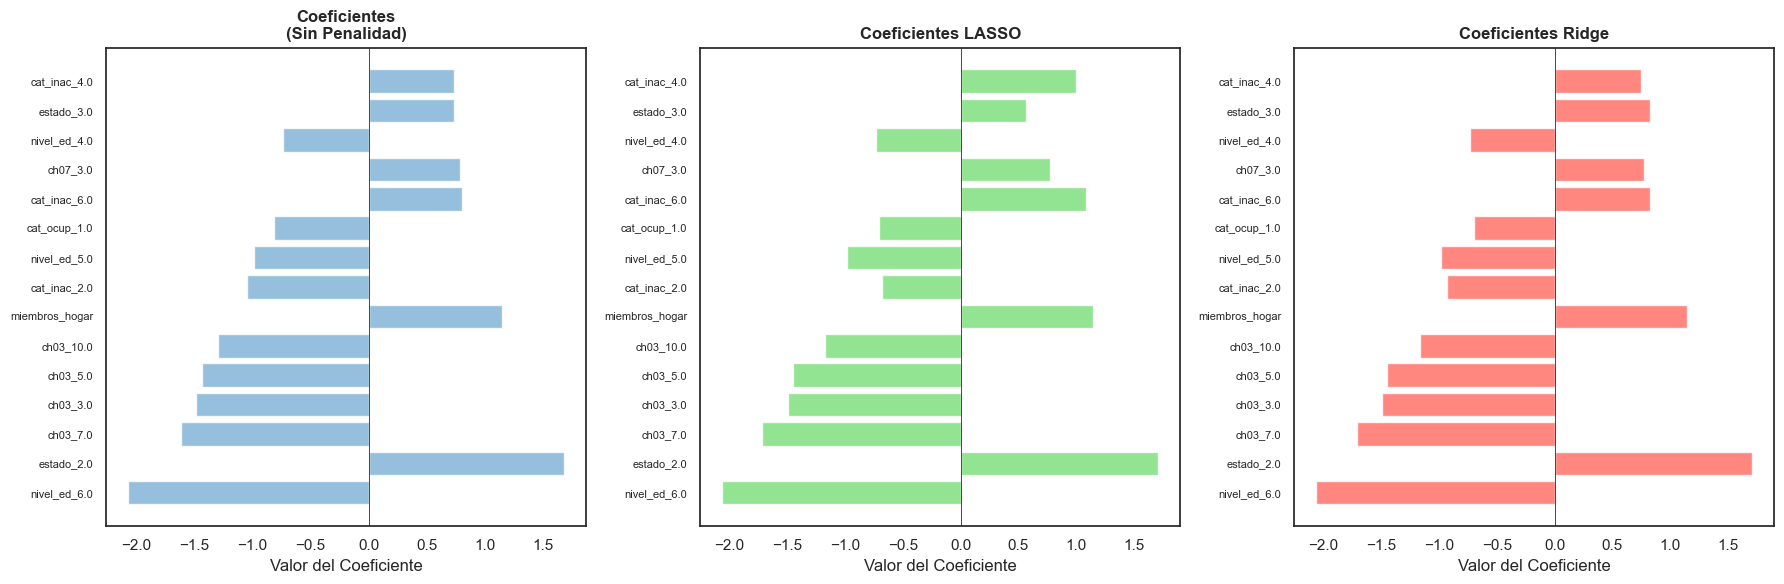

Visualización comparativa completada - Tonos pastel: Azul, Verde, Rojo


In [60]:
# =============================================================
# A.3.3) VISUALIZACIÓN COMPARATIVA FINAL 
# =============================================================

# Gráfico de comparación de coeficientes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Top 15 variables por magnitud (sin penalidad)
top_vars = tabla_coefs.head(15)

# Definir paleta de colores pastel según tu solicitud
pastel_blue = '#7BAFD4'       # Azul pastel - Panel A
pastel_green = '#77DD77'     # Verde pastel - Panel B (LASSO)  
pastel_red = '#FF6961'       # Rojo pastel - Panel C (Ridge)

# Panel A: Coeficientes sin penalidad 
bars1 = axes[0].barh(range(len(top_vars)), top_vars['logit_sin_penalidad'], color=pastel_blue, alpha=0.8)
axes[0].set_yticks(range(len(top_vars)))
axes[0].set_yticklabels(top_vars['variable'], fontsize=8)
axes[0].set_title('Coeficientes\n(Sin Penalidad)', fontweight='bold')
axes[0].set_xlabel('Valor del Coeficiente')
axes[0].axvline(0, color='black', linewidth=0.5)

# Panel B: Coeficientes LASSO 
bars2 = axes[1].barh(range(len(top_vars)), top_vars['logit_L1_lambda_cv'], color=pastel_green, alpha=0.8)
axes[1].set_yticks(range(len(top_vars)))
axes[1].set_yticklabels(top_vars['variable'], fontsize=8)
axes[1].set_title('Coeficientes LASSO', fontweight='bold')
axes[1].set_xlabel('Valor del Coeficiente')
axes[1].axvline(0, color='black', linewidth=0.5)

# Panel C: Coeficientes Ridge 
bars3 = axes[2].barh(range(len(top_vars)), top_vars['logit_L2_lambda_cv'], color=pastel_red, alpha=0.8)
axes[2].set_yticks(range(len(top_vars)))
axes[2].set_yticklabels(top_vars['variable'], fontsize=8)
axes[2].set_title('Coeficientes Ridge', fontweight='bold')
axes[2].set_xlabel('Valor del Coeficiente')
axes[2].axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Visualización comparativa completada - Tonos pastel: Azul, Verde, Rojo")

In [24]:
# ----------------------------------------------------------------
# B. ÁRBOLES DE DECISIÓN
# ----------------------------------------------------------------

In [31]:
# =============================================================
# B.1.1) Árbol inicial para obtener grilla de ccp_alpha
# =============================================================
from sklearn.tree import DecisionTreeClassifier

# Árbol no podado (complejo) para derivar ccp_alphas
tree_raw = DecisionTreeClassifier(
    random_state=444
)
tree_raw.fit(X_train_processed, y_train)  #  Usar datos preprocesados

# Grilla de valores de costo de complejidad
path = tree_raw.cost_complexity_pruning_path(X_train_processed, y_train)
ccp_alphas = path.ccp_alphas

print("Cantidad de valores en grilla ccp_alpha:", len(ccp_alphas))
print("Rango de ccp_alpha: [{:.6f}, {:.6f}]".format(ccp_alphas.min(), ccp_alphas.max()))
print("Primeros 10 valores:", ccp_alphas[:10])

Cantidad de valores en grilla ccp_alpha: 791
Rango de ccp_alpha: [-0.000000, 0.062733]
Primeros 10 valores: [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [32]:
# =============================================================
# B.1.2) 10-FOLD CV PARA CADA CCP_ALPHA
# =============================================================
from sklearn.model_selection import cross_val_score
import numpy as np

# 1) Limpiar grilla: quitar negativos, duplicados y valores extremos
ccp_alphas_clean = np.unique(ccp_alphas)
ccp_alphas_clean = ccp_alphas_clean[ccp_alphas_clean >= 0]
ccp_alphas_clean = ccp_alphas_clean[ccp_alphas_clean <= ccp_alphas_clean.mean() * 10]  # Evitar outliers

print("Cantidad de ccp_alpha luego de limpieza:", len(ccp_alphas_clean))
print("Rango limpio: [{:.6f}, {:.6f}]".format(ccp_alphas_clean.min(), ccp_alphas_clean.max()))

# 2) Cross-validation para cada ccp_alpha (con barra de progreso)
mean_errors = []
std_errors = []

print("\n🔍 Ejecutando 10-fold CV para cada ccp_alpha...")
for i, ccp in enumerate(ccp_alphas_clean):
    tree = DecisionTreeClassifier(
        random_state=444,
        ccp_alpha=ccp
    )
    scores = cross_val_score(
        tree,
        X_train_processed,  # Usar datos preprocesados
        y_train,
        cv=10,
        scoring='accuracy'
    )
    mean_error = 1 - scores.mean()
    std_error = scores.std()
    
    mean_errors.append(mean_error)
    std_errors.append(std_error)
    
    if i % 5 == 0:  # Progress cada 5 valores
        print(f"  Procesado {i+1}/{len(ccp_alphas_clean)} - ccp_alpha: {ccp:.6f}")

mean_errors = np.array(mean_errors)
std_errors = np.array(std_errors)
best_index = np.argmin(mean_errors)

best_ccp_alpha = ccp_alphas_clean[best_index]
print(f"\n MEJOR CCP_ALPHA ENCONTRADO: {best_ccp_alpha:.6f}")
print(f"   - Error de clasificación: {mean_errors[best_index]:.4f}")
print(f"   - Desviación estándar: {std_errors[best_index]:.4f}")

Cantidad de ccp_alpha luego de limpieza: 546
Rango limpio: [0.000000, 0.003683]

🔍 Ejecutando 10-fold CV para cada ccp_alpha...
  Procesado 1/546 - ccp_alpha: 0.000000
  Procesado 6/546 - ccp_alpha: 0.000003
  Procesado 11/546 - ccp_alpha: 0.000004
  Procesado 16/546 - ccp_alpha: 0.000006
  Procesado 21/546 - ccp_alpha: 0.000009
  Procesado 26/546 - ccp_alpha: 0.000012
  Procesado 31/546 - ccp_alpha: 0.000014
  Procesado 36/546 - ccp_alpha: 0.000016
  Procesado 41/546 - ccp_alpha: 0.000017
  Procesado 46/546 - ccp_alpha: 0.000020
  Procesado 51/546 - ccp_alpha: 0.000025
  Procesado 56/546 - ccp_alpha: 0.000028
  Procesado 61/546 - ccp_alpha: 0.000032
  Procesado 66/546 - ccp_alpha: 0.000038
  Procesado 71/546 - ccp_alpha: 0.000041
  Procesado 76/546 - ccp_alpha: 0.000042
  Procesado 81/546 - ccp_alpha: 0.000046
  Procesado 86/546 - ccp_alpha: 0.000049
  Procesado 91/546 - ccp_alpha: 0.000051
  Procesado 96/546 - ccp_alpha: 0.000052
  Procesado 101/546 - ccp_alpha: 0.000054
  Procesado 

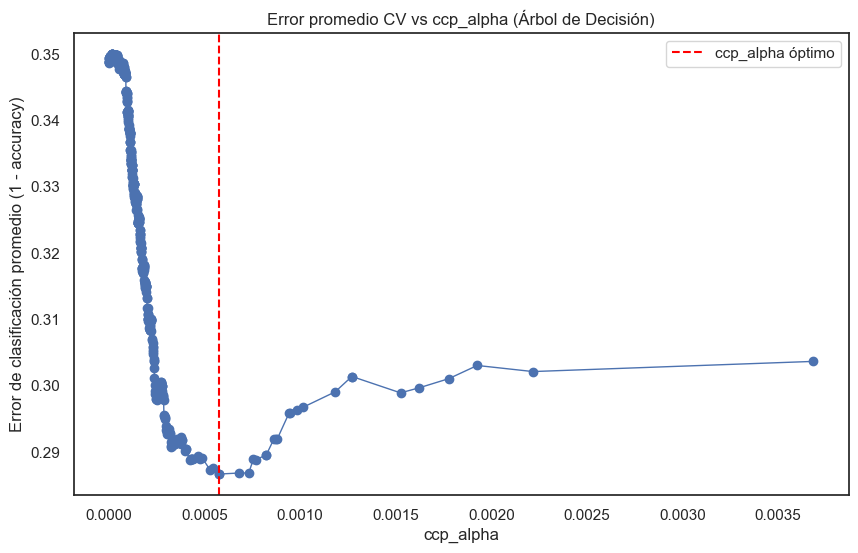

📊 RESUMEN GRÁFICO:
• ccp_alpha óptimo: 0.000575
• Error mínimo: 0.2866
• Rango de errores: [0.2866, 0.3499]


In [54]:
# =============================================================
# B.1.3) GRÁFICO: ERROR PROMEDIO VS CCP_ALPHA
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_clean, mean_errors, marker='o', linewidth=1)
plt.axvline(best_ccp_alpha, color='red', linestyle='--', label='ccp_alpha óptimo')
plt.xlabel("ccp_alpha")
plt.ylabel("Error de clasificación promedio (1 - accuracy)")
plt.title("Error promedio CV vs ccp_alpha (Árbol de Decisión)")
plt.legend()
plt.show()

# Información adicional (solo en print)
print(f" RESUMEN GRÁFICO:")
print(f"• ccp_alpha óptimo: {best_ccp_alpha:.6f}")
print(f"• Error mínimo: {mean_errors[best_index]:.4f}")
print(f"• Rango de errores: [{mean_errors.min():.4f}, {mean_errors.max():.4f}]")

In [34]:
# =============================================================
# B.2.1) ENTRENAR ÁRBOL FINAL PODADO CON CCP_ALPHA ÓPTIMO (MEJORADO)
# =============================================================
from sklearn.tree import DecisionTreeClassifier

tree_final = DecisionTreeClassifier(
    random_state=444,
    ccp_alpha=best_ccp_alpha
)

tree_final.fit(X_train_processed, y_train)  #  Usar datos preprocesados

# Métricas del árbol final
y_pred_tree = tree_final.predict(X_train_processed)
train_accuracy = (y_pred_tree == y_train).mean()

print(" ÁRBOL FINAL - CARACTERÍSTICAS:")
print(f"• Profundidad: {tree_final.get_depth()}")
print(f"• Número de nodos: {tree_final.tree_.node_count}")
print(f"• Número de hojas: {tree_final.get_n_leaves()}")
print(f"• Accuracy en entrenamiento: {train_accuracy:.4f}")
print(f"• ccp_alpha utilizado: {best_ccp_alpha:.6f}")

 ÁRBOL FINAL - CARACTERÍSTICAS:
• Profundidad: 8
• Número de nodos: 65
• Número de hojas: 33
• Accuracy en entrenamiento: 0.7287
• ccp_alpha utilizado: 0.000575


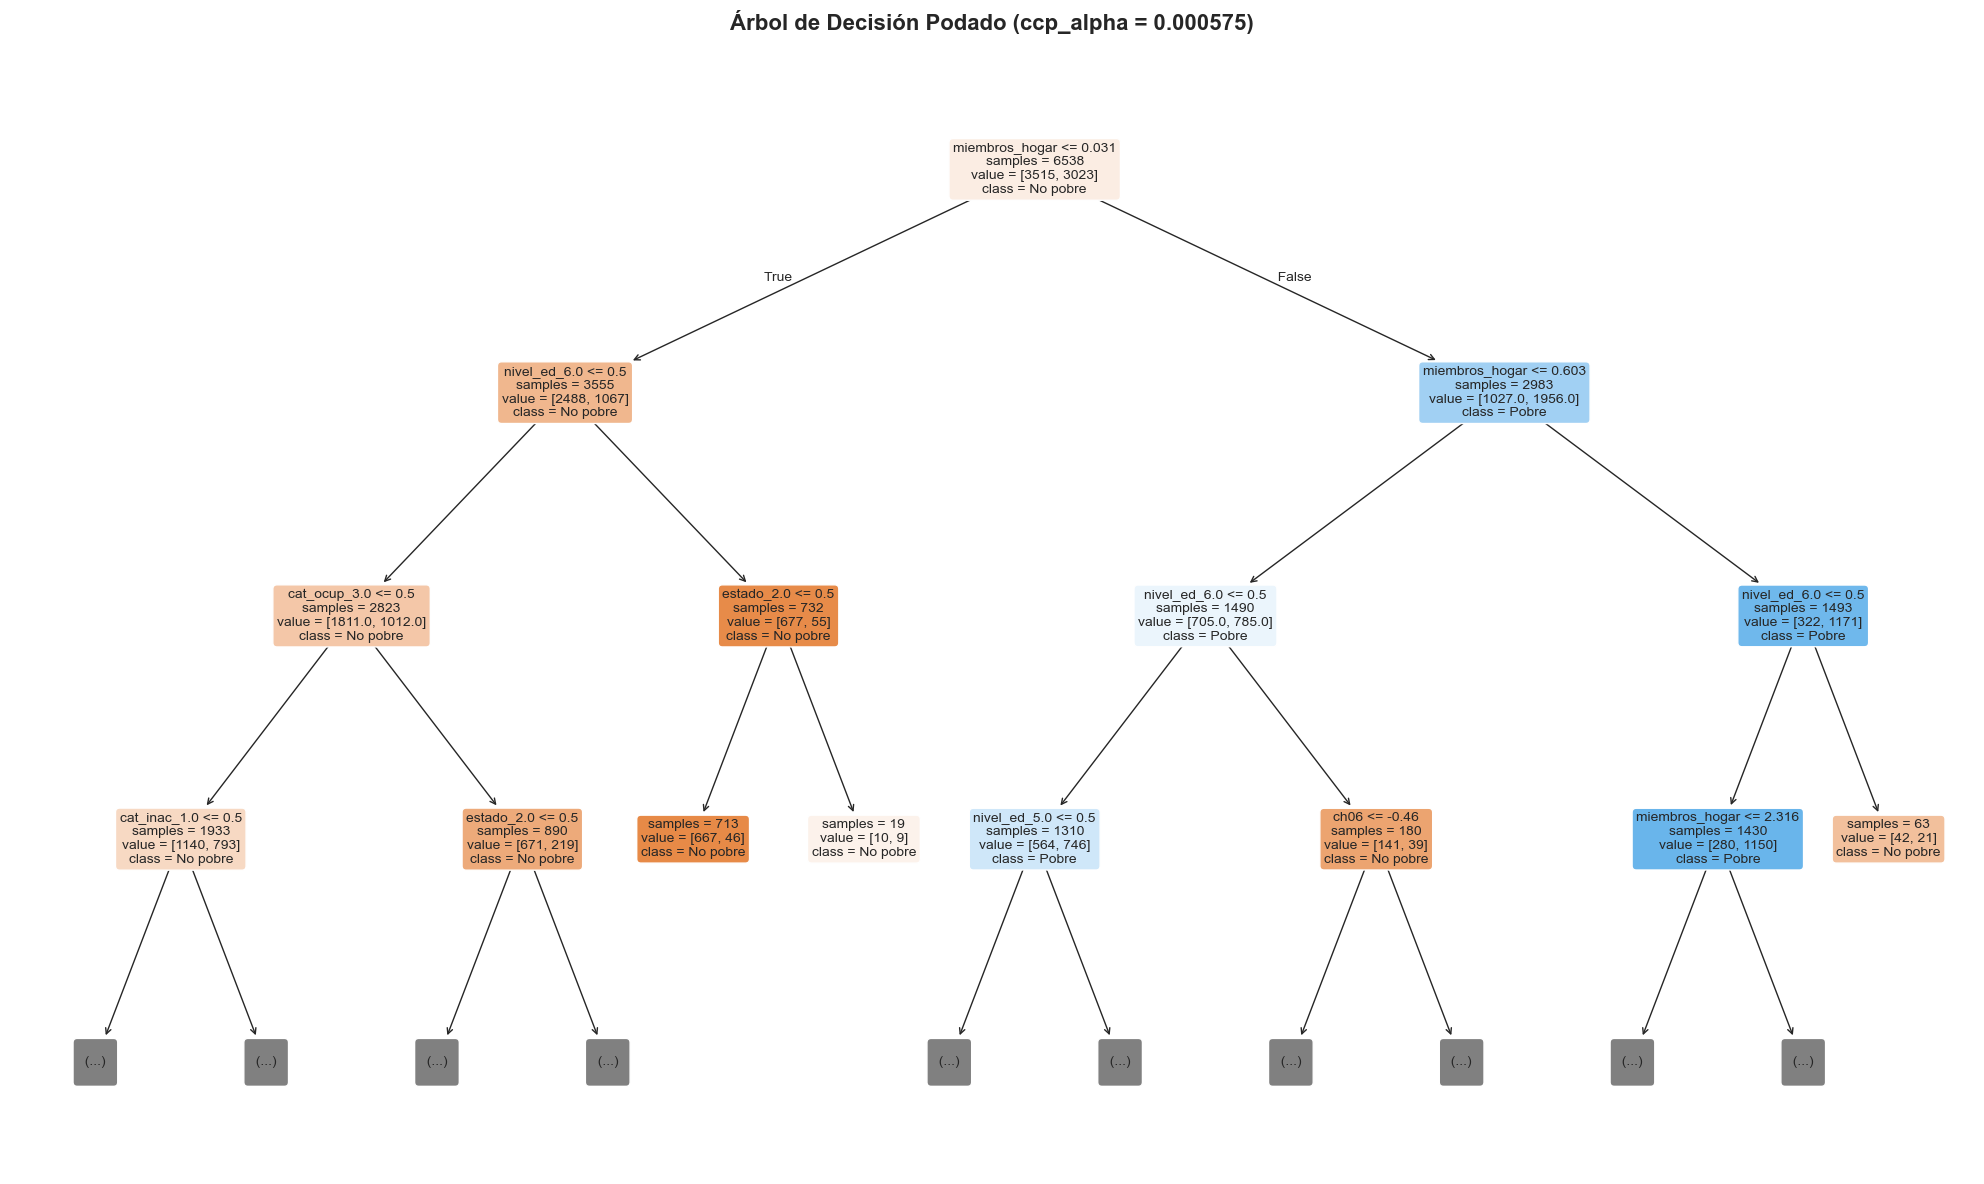

 INTERPRETACIÓN DEL ÁRBOL:
• Color naranja: predice 'Pobre'
• Color azul: predice 'No pobre'
• Intensidad del color: certeza de la predicción
• Los valores muestran la distribución de clases en cada nodo


In [35]:
# =============================================================
# B.2.2) PANEL A: VISUALIZACIÓN DEL ÁRBOL PODADO 
# =============================================================
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(
    tree_final,
    filled=True,
    rounded=True,
    feature_names=feature_names,  #  Usar nombres de features preprocesados
    class_names=['No pobre', 'Pobre'],
    max_depth=3,   # Mostrar hasta profundidad 3 para claridad
    fontsize=10,
    impurity=False  # Opcional: quitar impureza para más claridad
)
plt.title(f"Árbol de Decisión Podado (ccp_alpha = {best_ccp_alpha:.6f})", 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(" INTERPRETACIÓN DEL ÁRBOL:")
print("• Color naranja: predice 'Pobre'")
print("• Color azul: predice 'No pobre'")
print("• Intensidad del color: certeza de la predicción")
print("• Los valores muestran la distribución de clases en cada nodo")

/var/folders/s4/6l24fs1j5832swn8lwhsnhnm0000gn/T/ipykernel_9950/1644385024.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


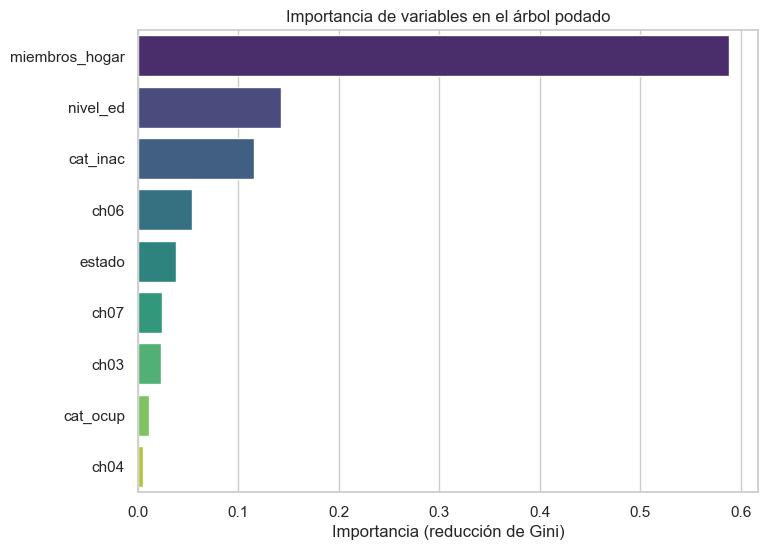

Variables con importancia > 0: 9 de 9


,variable,importancia
8,miembros_hogar,0.588011
5,nivel_ed,0.141895
7,cat_inac,0.115181
2,ch06,0.054092
4,estado,0.037667
3,ch07,0.024212
0,ch03,0.022729
6,cat_ocup,0.011066
1,ch04,0.005146


In [38]:
# =============================================================
# B.2.3) PANEL B: IMPORTANCIA DE VARIABLES (SIMPLIFICADO)
# =============================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el árbol con las variables originales (sin preprocesar)
tree_final_simple = DecisionTreeClassifier(
    random_state=444,
    ccp_alpha=best_ccp_alpha
)

tree_final_simple.fit(X_train, y_train)  # Usar X_train original

importancias = tree_final_simple.feature_importances_

df_imp = pd.DataFrame({
    'variable': X_train.columns,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_imp,
    x='importancia',
    y='variable',
    palette='viridis'
)
plt.title("Importancia de variables en el árbol podado")
plt.xlabel("Importancia (reducción de Gini)")
plt.ylabel("")
plt.show()

print(f"Variables con importancia > 0: {(df_imp['importancia'] > 0).sum()} de {len(df_imp)}")
display(df_imp)

In [39]:
# ----------------------------------------------------------------
# C. COMPARACIÓN ENTRE MÉTODOS
# ----------------------------------------------------------------

In [40]:
# =============================================================
# C0) ESCALADO Y KNN ÓPTIMO (COMPLETADO)
# =============================================================
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

print("🔍 BUSCANDO K ÓPTIMO PARA KNN...")

# Escalar X_train y X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Búsqueda de K óptimo (1 a 20) con 5-fold CV
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
optimal_score = max(k_scores)

# Entrenar modelo final con K óptimo
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

print(f" K ÓPTIMO ENCONTRADO: {optimal_k}")
print(f"   - Precisión en CV (KNN): {optimal_score:.4f}")
print(f"   - Precisión en entrenamiento: {knn_optimal.score(X_train_scaled, y_train):.4f}")

🔍 BUSCANDO K ÓPTIMO PARA KNN...
✅ K ÓPTIMO ENCONTRADO: 19
   - Precisión en CV (KNN): 0.7111
   - Precisión en entrenamiento: 0.7450


In [41]:
# =============================================================
# C1) MÉTRICAS DE TODOS LOS MODELOS (MEJORADO)
# =============================================================
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

def compute_metrics(model, X_test, y_test, name):
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    return {
        'modelo': name,
        'accuracy': acc,
        '1-accuracy': 1 - acc,
        'recall_pobre': rec,
        'precision_pobre': prec,
        'f1_score': f1,
        'AUC': auc_score,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

print(" CALCULANDO MÉTRICAS PARA TODOS LOS MODELOS...")

resultados = []

# Modelos logísticos (usar datos preprocesados para consistencia)
resultados.append(compute_metrics(logit_none,      X_test_processed, y_test, "Logit sin penalidad"))
resultados.append(compute_metrics(logit_l1_final,  X_test_processed, y_test, "LASSO (λ_cv)"))
resultados.append(compute_metrics(logit_l2_final,  X_test_processed, y_test, "Ridge (λ_cv)"))

# Árbol podado (usar datos originales)
resultados.append(compute_metrics(tree_final_simple, X_test, y_test, "Árbol podado"))

# KNN (usar datos escalados)
resultados.append(compute_metrics(knn_optimal,     X_test_scaled, y_test, "KNN (K óptimo)"))

# Crear tabla comparativa
tabla_metricas = pd.DataFrame([
    {
        'Modelo': r['modelo'],
        'Accuracy': round(r['accuracy'], 4),
        '1 - Accuracy': round(r['1-accuracy'], 4),
        'Recall pobre': round(r['recall_pobre'], 4),
        'Precisión pobre': round(r['precision_pobre'], 4),
        'F1-Score': round(r['f1_score'], 4),
        'AUC ROC': round(r['AUC'], 4)
    }
    for r in resultados
])

print("\n COMPARATIVA DE MÉTRICAS - TODOS LOS MODELOS:")
display(tabla_metricas)

# Ordenar por accuracy
tabla_ordenada = tabla_metricas.sort_values('Accuracy', ascending=False)
print("\n RANKING POR ACCURACY:")
display(tabla_ordenada)

 CALCULANDO MÉTRICAS PARA TODOS LOS MODELOS...

 COMPARATIVA DE MÉTRICAS - TODOS LOS MODELOS:


,Modelo,Accuracy,1 - Accuracy,Recall pobre,Precisión pobre,F1-Score,AUC ROC
0,Logit sin penalidad,0.7131,0.2869,0.6582,0.7026,0.6797,0.7907
1,LASSO (λ_cv),0.7127,0.2873,0.6566,0.7027,0.6789,0.7908
2,Ridge (λ_cv),0.7127,0.2873,0.6566,0.7027,0.6789,0.7908
3,Árbol podado,0.7006,0.2994,0.6373,0.6912,0.6632,0.7767
4,KNN (K óptimo),0.7052,0.2948,0.6350,0.6998,0.6659,0.7790



 RANKING POR ACCURACY:


,Modelo,Accuracy,1 - Accuracy,Recall pobre,Precisión pobre,F1-Score,AUC ROC
0,Logit sin penalidad,0.7131,0.2869,0.6582,0.7026,0.6797,0.7907
1,LASSO (λ_cv),0.7127,0.2873,0.6566,0.7027,0.6789,0.7908
2,Ridge (λ_cv),0.7127,0.2873,0.6566,0.7027,0.6789,0.7908
4,KNN (K óptimo),0.7052,0.2948,0.6350,0.6998,0.6659,0.7790
3,Árbol podado,0.7006,0.2994,0.6373,0.6912,0.6632,0.7767


 MATRICES DE CONFUSIÓN - COMPARATIVA


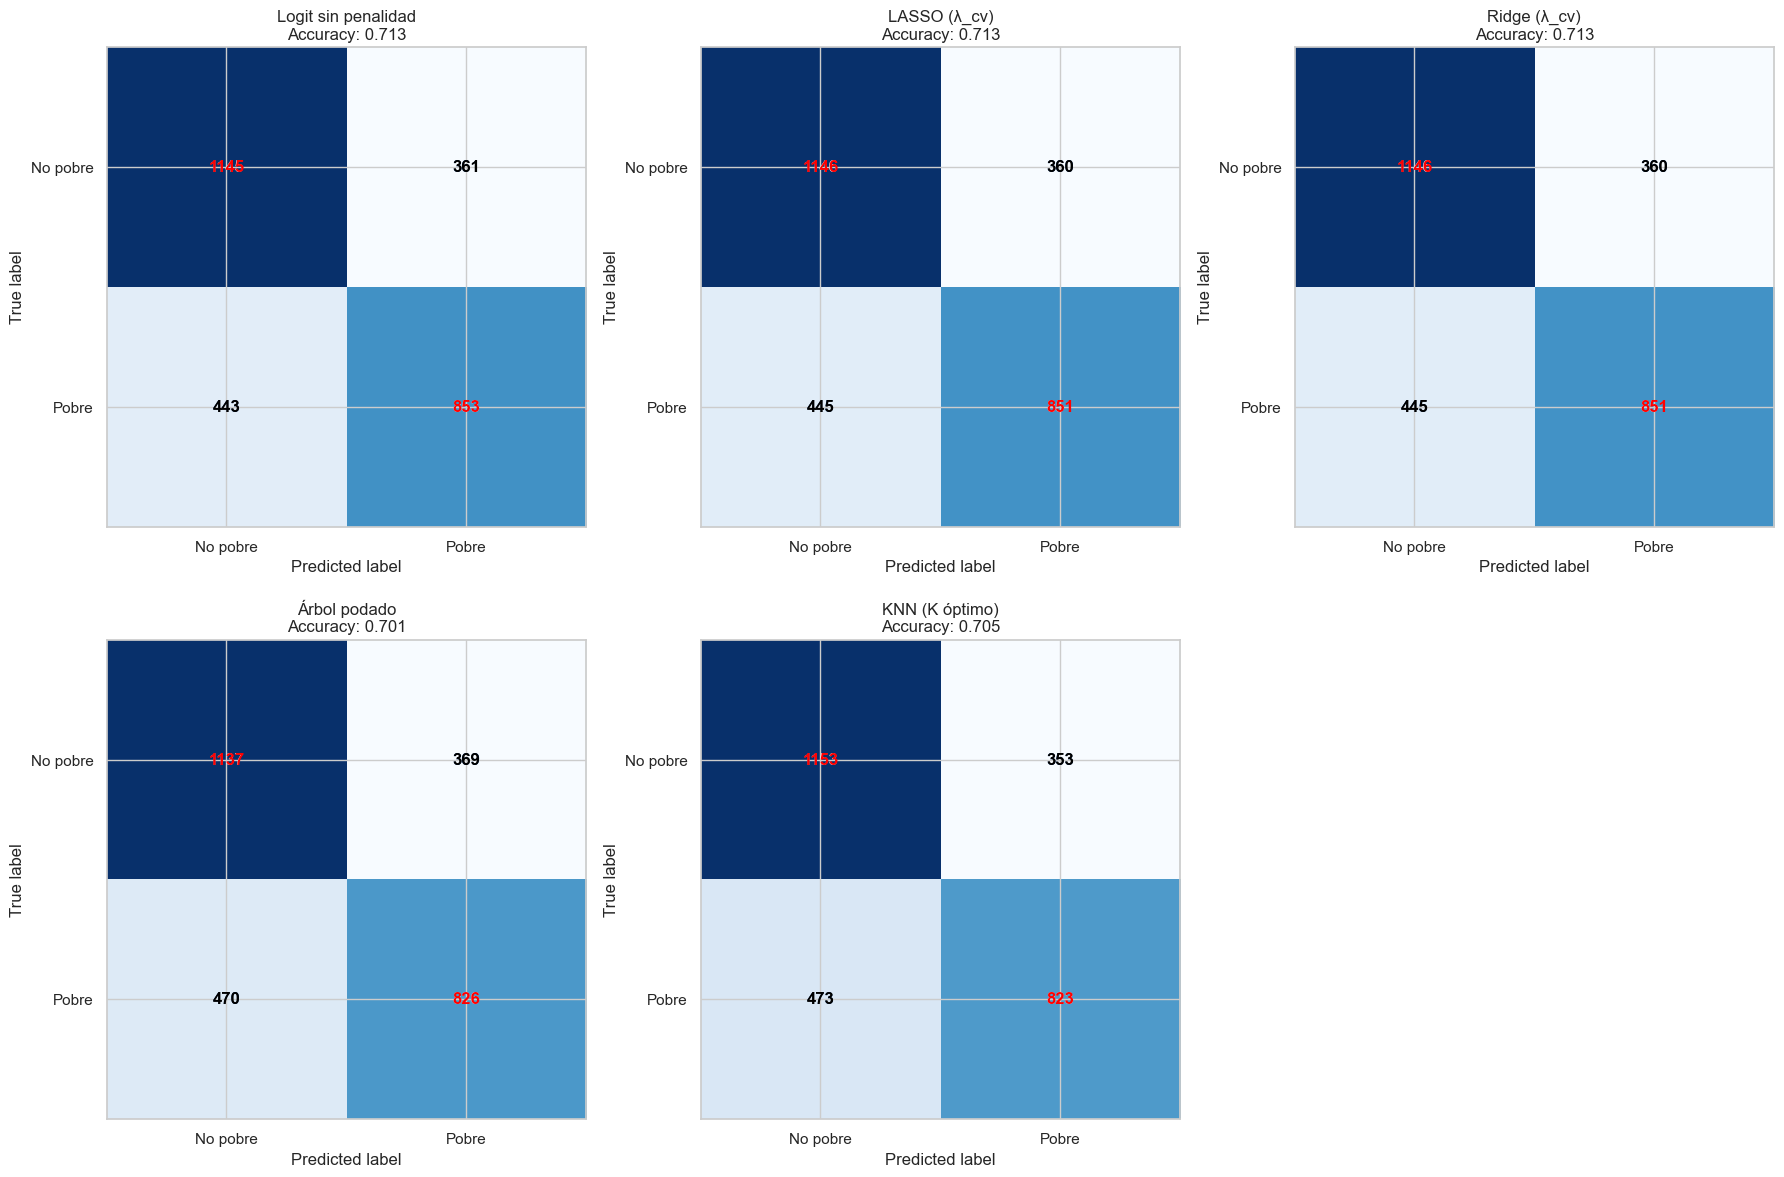


 RESUMEN MATRICES DE CONFUSIÓN:

Logit sin penalidad:
  Verdaderos positivos (pobre): 853
  Falsos positivos: 361
  Falsos negativos: 443
  Verdaderos negativos: 1145

LASSO (λ_cv):
  Verdaderos positivos (pobre): 851
  Falsos positivos: 360
  Falsos negativos: 445
  Verdaderos negativos: 1146

Ridge (λ_cv):
  Verdaderos positivos (pobre): 851
  Falsos positivos: 360
  Falsos negativos: 445
  Verdaderos negativos: 1146

Árbol podado:
  Verdaderos positivos (pobre): 826
  Falsos positivos: 369
  Falsos negativos: 470
  Verdaderos negativos: 1137

KNN (K óptimo):
  Verdaderos positivos (pobre): 823
  Falsos positivos: 353
  Falsos negativos: 473
  Verdaderos negativos: 1153


In [42]:
# =============================================================
# C2) MATRICES DE CONFUSIÓN 
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

print(" MATRICES DE CONFUSIÓN - COMPARATIVA")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, r in enumerate(resultados):
    cm = confusion_matrix(y_test, r['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No pobre', 'Pobre'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"{r['modelo']}\nAccuracy: {r['accuracy']:.3f}")
    
    # Añadir anotaciones
    for j in range(2):
        for k in range(2):
            axes[i].text(k, j, f'{cm[j, k]}', 
                        ha='center', va='center', 
                        color='red' if cm[j, k] > cm.max()/2 else 'black',
                        fontweight='bold')

# Ocultar el último subplot si hay número impar de modelos
if len(resultados) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Resumen numérico
print("\n RESUMEN MATRICES DE CONFUSIÓN:")
for r in resultados:
    cm = confusion_matrix(y_test, r['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{r['modelo']}:")
    print(f"  Verdaderos positivos (pobre): {tp}")
    print(f"  Falsos positivos: {fp}")
    print(f"  Falsos negativos: {fn}")
    print(f"  Verdaderos negativos: {tn}")

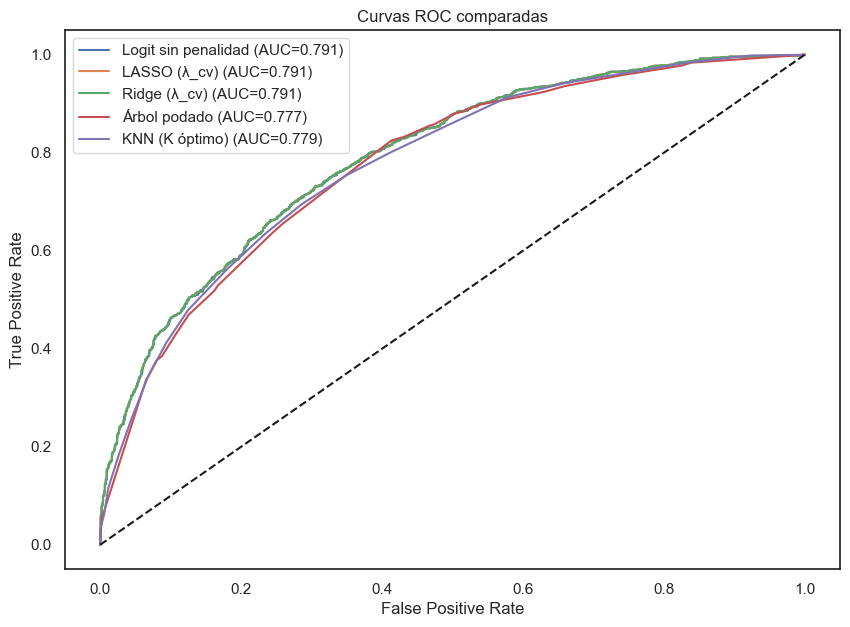

In [53]:
# =============================================================
# C3) CURVAS ROC COMPARADAS 
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

plt.figure(figsize=(10, 7))

for r in resultados:
    plt.plot(r['fpr'], r['tpr'], label=f"{r['modelo']} (AUC={r['AUC']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC comparadas")
plt.legend()
plt.show()

In [46]:
# =============================================================
# C4) ANÁLISIS COMPARATIVO Y RECOMENDACIONES
# =============================================================

print(" ANÁLISIS COMPARATIVO - TRADE-OFFS Y RECOMENDACIONES")

# Calcular diferencias
accuracy_diff = tabla_metricas['Accuracy'].max() - tabla_metricas['Accuracy'].min()
auc_diff = tabla_metricas['AUC ROC'].max() - tabla_metricas['AUC ROC'].min()

print(f"\n DIFERENCIAS ENTRE MODELOS:")
print(f"• Diferencia máxima en Accuracy: {accuracy_diff:.4f}")
print(f"• Diferencia máxima en AUC: {auc_diff:.4f}")

# Identificar mejores modelos por métrica
best_accuracy = tabla_metricas.loc[tabla_metricas['Accuracy'].idxmax()]
best_recall = tabla_metricas.loc[tabla_metricas['Recall pobre'].idxmax()]
best_auc = tabla_metricas.loc[tabla_metricas['AUC ROC'].idxmax()]

print(f"\n MEJORES MODELOS POR MÉTRICA:")
print(f"• Mejor Accuracy: {best_accuracy['Modelo']} ({best_accuracy['Accuracy']:.4f})")
print(f"• Mejor Recall pobre: {best_recall['Modelo']} ({best_recall['Recall pobre']:.4f})")
print(f"• Mejor AUC: {best_auc['Modelo']} ({best_auc['AUC ROC']:.4f})")

print(f"\n TRADE-OFF COMUNICACIÓN vs PERFORMANCE:")
print("• Métodos lineales (Logit): Mayor interpretabilidad, coeficientes claros")
print("• Métodos no lineales (KNN, Árbol): Mayor flexibilidad, menor interpretabilidad")
print("• Árbol: Reglas explícitas pero puede sobreajustar")
print("• KNN: 'Caja negra' pero puede capturar patrones complejos")

print(f"\n RECOMENDACIÓN PARA MINISTERIO:")
# Considerar recall (capacidad de identificar pobres) como métrica clave
best_recall_model = best_recall['Modelo']
best_recall_value = best_recall['Recall pobre']

print(f"• Para identificar grupos vulnerables: {best_recall_model}")
print(f"• Recall (sensibilidad): {best_recall_value:.1%}")
print(f"• Justificación: Maximizar identificación de personas en pobreza")

 ANÁLISIS COMPARATIVO - TRADE-OFFS Y RECOMENDACIONES

 DIFERENCIAS ENTRE MODELOS:
• Diferencia máxima en Accuracy: 0.0125
• Diferencia máxima en AUC: 0.0141

 MEJORES MODELOS POR MÉTRICA:
• Mejor Accuracy: Logit sin penalidad (0.7131)
• Mejor Recall pobre: Logit sin penalidad (0.6582)
• Mejor AUC: LASSO (λ_cv) (0.7908)

 TRADE-OFF COMUNICACIÓN vs PERFORMANCE:
• Métodos lineales (Logit): Mayor interpretabilidad, coeficientes claros
• Métodos no lineales (KNN, Árbol): Mayor flexibilidad, menor interpretabilidad
• Árbol: Reglas explícitas pero puede sobreajustar
• KNN: 'Caja negra' pero puede capturar patrones complejos

 RECOMENDACIÓN PARA MINISTERIO:
• Para identificar grupos vulnerables: Logit sin penalidad
• Recall (sensibilidad): 65.8%
• Justificación: Maximizar identificación de personas en pobreza
